# Тестовое задание по Python
Выпонил Фалеев Дмитрий

* Перевести файл в формат csv.
* Использовать Jupyter Notebook.


In [98]:
import numpy as np
import pandas as pd
#/content/test task Sheet1.csv

* Прочитать csv файл и перевести его в DataFrame (необходимо использовать библиотеку Pandas).

In [99]:
df = pd.read_csv('/content/test task Sheet1.csv', delimiter=',')
df.head()

,sex,d,m,y,town,email
0,w,23.0,10.0,2041.0,город. K5 Пермь,"vsghd,23@yandex.ru"
1,m,23.0,10.0,2041.0,город. K5 Волгоград,"vol,23@yandex.ru"
2,w,24.0,10.0,1976.0,Город Сочи,мама.24@gmail.ru
3,m,24.0,10.0,1961.0,Сочи,hfgdk/urb.24@gmail.ru
4,w,24.0,10.0,NaN,Волгоград,dg.24@gmail.ru


* Посмотреть информацию о DataFrame (формат каждого столбца, размерность, общую статистику).

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     7705 non-null   object 
 1   d       7988 non-null   float64
 2   m       7989 non-null   float64
 3   y       7992 non-null   float64
 4   town    7999 non-null   object 
 5   email   8000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 375.1+ KB


* Редактирование таблицы, привести все столбцы к единому формату:
Sex – «m» или «w»;




# Поле Sex

In [101]:
df['sex'].unique

<bound method Series.unique of 0         w
1         m
2         w
3         m
4         w
       ... 
7995      m
7996      w
7997    NaN
7998      m
7999      m
Name: sex, Length: 8000, dtype: object>

df['sex'].value_counts() показал, что "аномальные" значения записаны в 30 строках

In [102]:
df['sex'].isna().sum()


295

Очевидно, что количество "аномальных" значений соизмеримо с количество Nan, поэтому я сделаю их тоже Nan - и удалю впоследствии

In [103]:
df.loc[(df['sex'] != 'w') & (df['sex'] != 'm'), 'sex'] = np.NaN
df['sex'].isna().sum()


329

In [104]:
df['sex'].unique()

array(['w', 'm', nan], dtype=object)

D – «01», «02», «03» и тд.;
M – «01», «02», «03» и тд.;
Y  – «1999», «2012», «1945» и тд.;
Town  – «Ярославль», «Ногинск» и тд.;
Email –  example@example.ru.

# Поле D

In [105]:
df['d'].unique()

array([23., 24., 25., 26., 27., 28., 29., 30., 31.,  1., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.,  2., 20., 21., 22.,  3.,  4.,
        5.,  6.,  7.,  8.,  9., nan])

Надо перевести float в string и отформатировать

In [106]:
df['d'] = df['d'].apply(lambda x: '{0:02.0f}'.format(x))

In [107]:
df['d'].unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '01', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '02', '20',
       '21', '22', '03', '04', '05', '06', '07', '08', '09', 'nan'],
      dtype=object)

переведу nan в NaN

In [108]:
df['d'].isna().sum()

0

In [109]:
df.loc[(df['d'] == 'nan' ), 'd'] = np.NaN


In [110]:
df['d'].isna().sum()

12

# Поле M – «01», «02», «03» и тд

In [111]:
df['m'].unique()

array([10.,  8.,  9., 11., nan, 12.,  1.,  4.,  5.,  6.,  7.,  2.,  3.])

In [112]:
df['m'] = df['m'].apply(lambda x: '{0:02.0f}'.format(x))

In [113]:
df['m'].unique()

array(['10', '08', '09', '11', 'nan', '12', '01', '04', '05', '06', '07',
       '02', '03'], dtype=object)

In [114]:
df.loc[(df['d'] == 'nan' ), 'd'] = np.NaN


In [115]:
df['d'].isna().sum()

12

# Поле Y

In [116]:
df['y'].unique()

array([2041., 1976., 1961.,   nan, 1995., 1973., 1963., 1965., 1992.,
       1978., 1970., 1974., 1987., 1983., 1999., 2000., 1968., 1994.,
       1984., 1971., 1980., 1982., 1966., 1967., 1979., 1972., 1964.,
       1981., 1962., 1977., 1996., 1985., 1989., 1993., 1998., 1997.,
       1986., 1990., 1988., 1991., 2020., 1969., 1975.,   65., 1940.,
       1924., 2024.,   79., 1953., 1946., 2012.,   91., 2009.,   61.,
         82.,   98.,   77.,   83.])

что за год 2041? - скорее всего ошибка

In [117]:
df['y'].value_counts()[2041.]


2

Найду количество ячеек со значениями меньше 1900 года

In [118]:
df[df['y'] < 1900]['y'].value_counts()

65.0    2
79.0    1
91.0    1
61.0    1
82.0    1
98.0    1
77.0    1
83.0    1
Name: y, dtype: int64

In [119]:
df['y'].isna().sum()

8

присвою ячейки до 1900 и выше 2024 NaN

In [120]:
df.loc[(df['y'] < 1900) | (df['y'] > 2024), 'y'] = np.NaN


In [121]:
df['y'].isna().sum()

19

In [122]:
df.loc[(df['y'] == 'nan'), 'y'] = np.NaN


In [123]:
df['y'].isna().sum()

19

In [124]:
df.head()

,sex,d,m,y,town,email
0,w,23,10,NaN,город. K5 Пермь,"vsghd,23@yandex.ru"
1,m,23,10,NaN,город. K5 Волгоград,"vol,23@yandex.ru"
2,w,24,10,1976.0,Город Сочи,мама.24@gmail.ru
3,m,24,10,1961.0,Сочи,hfgdk/urb.24@gmail.ru
4,w,24,10,NaN,Волгоград,dg.24@gmail.ru


переведу float > string

In [125]:
df['y'] = df['y'].dropna().round(0).astype(int).astype(str)



In [126]:
df['y'].dtype

dtype('O')

# Town – «Ярославль», «Ногинск» + задание 8 Убрать слово город из столбца «town».


In [127]:
df['town'].unique()

array(['город. K5 Пермь', 'город. K5 Волгоград', 'Город Сочи', 'Сочи',
       'Волгоград', 'Москва', 'Пермь', 'Севастополь', 'Красноярск',
       'ггород Волгоград', 'город. K5 Москва', 'город. K5 Севастополь',
       'город. K5 Красноярск', 'Город Москва', 'город. K5 Сочи',
       'Город Волгоград', 'ггород Москва', 'ггород Пермь',
       'Город Красноярск', 'Город Пермь', 'Город Севастополь',
       'ггород Сочи', 'ггород Севастополь', 'ггород Красноярск', nan],
      dtype=object)

надо оставить только последнее слово

In [128]:
df['town'] = df['town'].str.rsplit(' ', n=1).str.get(-1)


In [129]:
df['town'].unique()

array(['Пермь', 'Волгоград', 'Сочи', 'Москва', 'Севастополь',
       'Красноярск', nan], dtype=object)

In [130]:
df['y'].isna().sum()

19

# Email – example@example.ru.

In [131]:
df['email'].tail()

7995     hfyf.\t5\t@gmail.ru
7996    мама.\t12\t@gmail.ru
7997    sgsg.\t13\t@gmail.ru
7998      огврпы.31@gmail.ru
7999      привет.29@gmail.ru
Name: email, dtype: object

In [132]:
df['email'].nunique()

3481

**использую библиотеку validate_email**
* PS я мог использовать regex
* df["email"].str.match(r"^.+@.+\..{2,}$")





In [133]:
pip install email_validator


In [150]:
from email_validator import validate_email, EmailNotValidError
def validate_single_email(email):
   #отсекание русских букв
   if any('\u0400' <= char <= '\u04FF' for char in email):
      return False
   else:
      try:
          v = validate_email(email)
          return True
      except EmailNotValidError:
          return False

In [151]:
validate_single_email("дима Фалеев")

False

In [152]:
validate_single_email("faleev2@yandex.ru")

True

In [153]:
validate_single_email("огврпы.24@gmail.com")

False

In [155]:
df['email'].apply(validate_single_email).value_counts()

False    7219
True      781
Name: email, dtype: int64

In [156]:
def validate_emails(email_series):
   valid_emails = email_series.apply(validate_single_email)
   return valid_emails

df['email_valid'] = validate_emails(df['email'])


In [157]:
df['email_valid'].value_counts()

False    7219
True      781
Name: email_valid, dtype: int64

In [158]:
df.loc[(df['email_valid']==False), 'email'] = np.NaN


In [159]:
df.loc[df['email_valid'] == True]

,sex,d,m,y,town,email,email_valid
14,w,24,10,1974,Волгоград,hdg.24@gmail.com,True
16,w,24,10,1983,Пермь,pok.24@gmail.com,True
18,m,24,10,2000,Пермь,pok.24@gmail.com,True
19,m,24,10,1995,Красноярск,jg.vf.24@gmail.com,True
20,w,24,10,1968,Пермь,fjkhdr.24@gmail.com,True
...,...,...,...,...,...,...,...
1907,w,31,12,1970,Волгоград,vol.31@gmail.com,True
1909,w,31,12,1992,Севастополь,qu.31@gmail.com,True
1911,m,31,12,1966,Волгоград,mfl.31@gmail.com,True
1914,m,31,12,1969,Волгоград,hfyf.31@gmail.com,True


#Переименовать столбцы (перевести на русский язык).


In [160]:
df = df.rename (columns= {'sex': 'Пол', 'd': 'День', 'm': 'Месяц', 'y': 'Год', 'town': 'Город'})

In [161]:
df = df.drop('email_valid', axis=1)


In [162]:
df.head()

,Пол,День,Месяц,Год,Город,email
0,w,23,10,NaN,Пермь,NaN
1,m,23,10,NaN,Волгоград,NaN
2,w,24,10,1976,Сочи,NaN
3,m,24,10,1961,Сочи,NaN
4,w,24,10,NaN,Волгоград,NaN


#Соединить дату, месяц и год рождения в один столбец, назвать «dob».


In [163]:
df['dob'] = df['День'] + ' ' + df['Месяц'] + ' ' + df['Год']

In [164]:
df = df.dropna()

In [165]:
df.head()

,Пол,День,Месяц,Год,Город,email,dob
14,w,24,10,1974,Волгоград,hdg.24@gmail.com,24 10 1974
16,w,24,10,1983,Пермь,pok.24@gmail.com,24 10 1983
18,m,24,10,2000,Пермь,pok.24@gmail.com,24 10 2000
19,m,24,10,1995,Красноярск,jg.vf.24@gmail.com,24 10 1995
20,w,24,10,1968,Пермь,fjkhdr.24@gmail.com,24 10 1968


#Убрать слово город из столбца «town».
 # Сделал

# Построить диаграмму по «town» (необходимо использовать библиотеку Matplotlip).

In [166]:
import matplotlib.pyplot as plt


Text(0, 0.5, '')

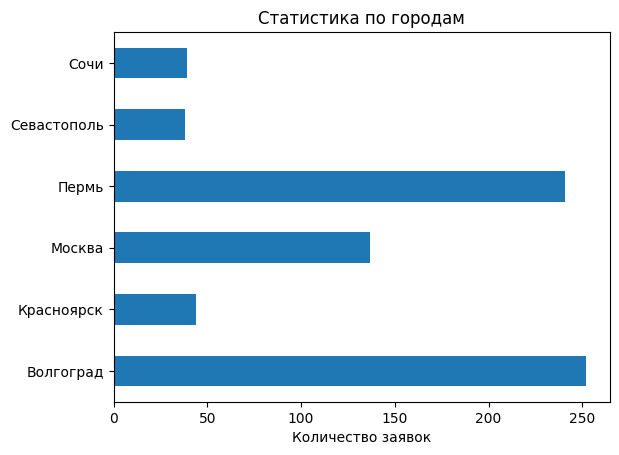

In [167]:
ax = df.groupby('Город').size().plot.barh()
ax.set_title('Статистика по городам')
ax.set_xlabel('Количество заявок')
ax.set_ylabel('')


#Построить диаграмму по «sex» (необходимо использовать библиотеку Matplotlip).


In [168]:
df.loc[df['Пол'] == 'w', 'Пол'] = 'Женский'
df.loc[df['Пол'] == 'm', 'Пол'] = 'Мужской'


Text(0, 0.5, '')

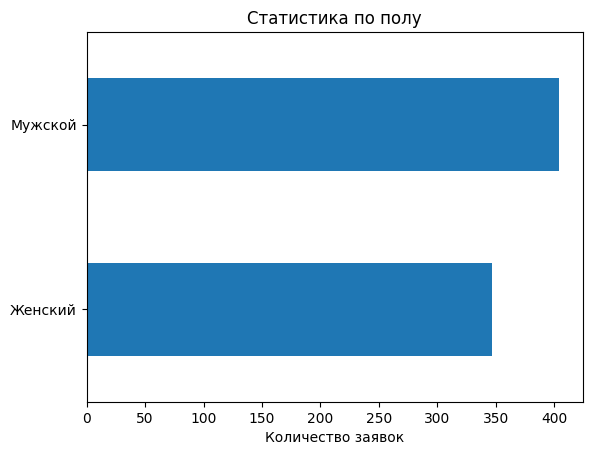

In [169]:
ax = df.groupby('Пол').size().plot.barh()
ax.set_title('Статистика по полу')
ax.set_xlabel('Количество заявок')
ax.set_ylabel('')


#Отфильтровать столбец «sex» по алфавиту.


In [170]:
df['Пол'].sort_values()

14      Женский
1555    Женский
1556    Женский
804     Женский
803     Женский
         ...   
824     Мужской
813     Мужской
808     Мужской
1303    Мужской
1916    Мужской
Name: Пол, Length: 751, dtype: object

* Выгрузить отредактированный файл в формате csv, назвать «Выгрузка_тестовой_задачи».



In [171]:
df.to_csv (r'/content/Выгрузка_тестовой_задачи.csv' )

* Сохранить работу в формате .ipynb, назвать «Итог_тестовая_задача».
* Приложить 2 файла к ответу.